In [1]:
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import scipy.stats as stats
import datetime as dt
import vars.var_ntime as nvar
import statsmodels.api as sm



➢ Notional: €89,083,545 

➢ Contract Start Date: March 13, 2007 

➢ “Spread” Start Date: March 13, 2009 

➢ Expiration Date: December 13, 2022 

Swap Terms for MdP 

• Receiving leg: 4.76% semi-annually (June 13 and December 13) 

• Paying leg: • 1.76% semi-annually June 13 and December13) 

• “Spread” quarterly (March 13, June 13, September 13, and December 13) 

Spread = `Max [ 0.0%, (Previous spread + 2 x Max (2.0% – Euribor3M; 0.0%) + 2 x Max (Euribor3M – 6.0%; 0.0%) – DigiCoupon) ] 
`


Where DigiCoupon = 0.50%, if 2.0% < Euribor 3M < 6.0% 
                     0.0%, for all other Euribor 3M 


The Spread is set to 0 from March 13, 2007 to December 13, 2008 





In [88]:
df=pd.read_excel("ALL_EURIBOR_Rates_ON_1WK_1M_2M_3M_6M.xls",sheet_name="Daily",parse_dates=['DATE'])

In [89]:
df.set_index("DATE",inplace=True)
df.columns=[item[3:5] for item in df.columns.to_list()]

In [90]:
df

,1M,1W,2M,3M,6M,ON
DATE,,,,,,
1999-01-04,3.23875,3.25000,3.22875,3.22125,3.20859,NaN
1999-01-05,3.23000,3.24500,3.22125,3.21234,3.19750,NaN
1999-01-06,3.22500,3.23625,3.21484,3.20734,3.18594,NaN
1999-01-07,3.22375,3.23625,3.21500,3.20250,3.17938,NaN
1999-01-08,3.22000,3.23500,3.20625,3.19750,3.16375,NaN
...,...,...,...,...,...,...
2021-02-15,-0.57829,-0.57643,-0.56071,-0.55129,-0.54029,-0.58543
2021-02-16,-0.57629,-0.57486,-0.55486,-0.54714,-0.53514,-0.58414
2021-02-17,-0.57800,-0.57643,-0.55514,-0.54771,-0.53657,-0.58429


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5775 entries, 1999-01-04 to 2021-02-19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1M      5775 non-null   float64
 1   1W      5775 non-null   float64
 2   2M      5775 non-null   float64
 3   3M      5775 non-null   float64
 4   6M      5775 non-null   float64
 5   ON      5254 non-null   float64
dtypes: float64(6)
memory usage: 315.8 KB


In [92]:
df.replace(to_replace=0,value=np.nan,inplace=True)

In [93]:
df.to_pickle("all_quotes.pkl")

In [2]:
df=pd.read_pickle("all_quotes.pkl")

In [3]:
df3m=df[['3M']]

In [13]:
3%2

1

In [69]:
df3m

,3M
DATE,
1999-01-04,3.22125
1999-01-05,3.21234
1999-01-06,3.20734
1999-01-07,3.20250
1999-01-08,3.19750
...,...
2021-02-15,-0.55129
2021-02-16,-0.54714
2021-02-17,-0.54771


In [107]:
newpd=pd.DataFrame()
for year in np.arange(2007,2021):
    for month in np.arange(3,14,3):
        try:
            newpd=pd.concat([df3m.loc[[dt.datetime(year,month,13)]],newpd],0)
        except:
            try:
                newpd=pd.concat([df3m.loc[[dt.datetime(year,month,12)]],newpd],0)
            except:
                newpd=pd.concat([df3m.loc[[dt.datetime(year,month,11)]],newpd],0)
  
        

In [108]:
newpd=newpd.sort_index()
newpd

,3M
DATE,
2007-03-13,3.89375
2007-06-13,4.14250
2007-09-13,4.73188
2007-12-13,4.94938
2008-03-13,4.60375
2008-06-13,4.95688
2008-09-12,4.95188
2008-12-12,3.28875
2009-03-13,1.64250


In [109]:
newpd['Payments']=np.zeros(len(newpd))

In [110]:
def myspread(r,spread):
    if r<6 and r>2:
        a=spread+2*max(2-r,0)+2*max(r-6,0)-0.5
    else:
        a=spread+2*max(2-r,0)+2*max(r-6,0)
    return max(a,0)
for i in np.arange(8,len(newpd)):
     newpd.iloc[i,1]=myspread(newpd.iloc[i,0],newpd.iloc[i-1,1])

In [111]:
newpd.columns=['Euro_3M','Spread_Paid']

In [118]:
newpd['Fixed_Received']=1.5

In [119]:
newpd.iloc[0::2,2]=0

In [123]:
newpd['Net_Cash_FLow']=newpd['Fixed_Received']-newpd['Spread_Paid']*0.25

In [128]:
newpd

,Euro_3M,Spread_Paid,Fixed_Received,Net_Cash_FLow
DATE,,,,
2007-03-13,3.89375,0.00000,0.0,0.000000
2007-06-13,4.14250,0.00000,1.5,1.500000
2007-09-13,4.73188,0.00000,0.0,0.000000
2007-12-13,4.94938,0.00000,1.5,1.500000
2008-03-13,4.60375,0.00000,0.0,0.000000
2008-06-13,4.95688,0.00000,1.5,1.500000
2008-09-12,4.95188,0.00000,0.0,0.000000
2008-12-12,3.28875,0.00000,1.5,1.500000
2009-03-13,1.64250,0.71500,0.0,-0.178750


In [129]:
newpd.to_excel("Real_payments.xlsx")

<AxesSubplot:xlabel='DATE'>

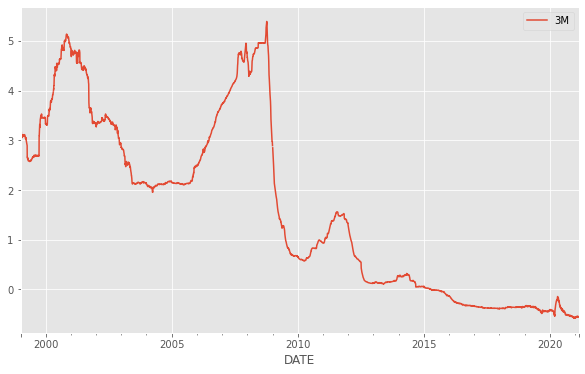

In [98]:
plt.style.use('ggplot')
# plt.figure(figsize=(15,10))
df3m.plot(figsize=(10,6))


<AxesSubplot:xlabel='DATE'>

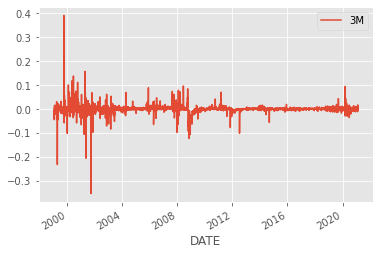

In [99]:
# analyze the daily change in Euribor 3M
chgs=df3m.diff().dropna()
chgs.plot()

In [100]:
sig=chgs.std()

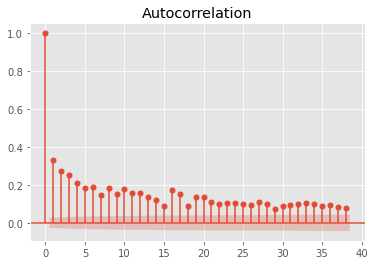

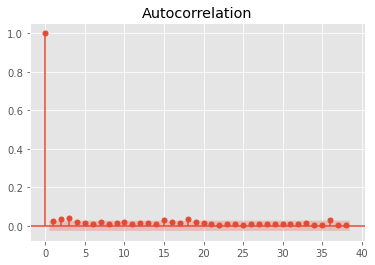

In [101]:
# check for autocorrelation and volatility clustering
fig1=plot_acf(chgs)
fig2=plot_acf(chgs**2)

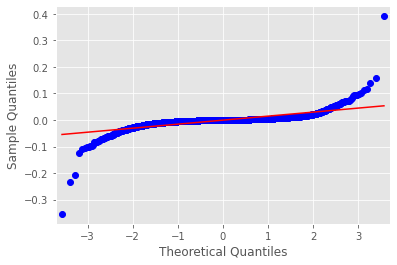

In [102]:
# QQ-plot
fig3=sm.qqplot(chgs.iloc[:,0],line='s')
# 

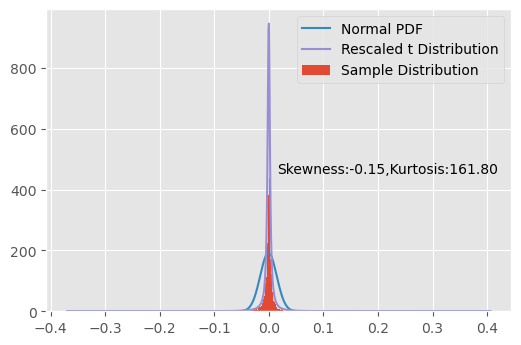

In [105]:
nvar.myhist(chgs,bins=1000)

Term Structure of Euro Interest Rates
Spot yield curves of AAA-rated European central bank bonds

Link:
`https://ec.europa.eu/eurostat/web/main/search?p_p_id=estatsearchportlet_WAR_estatsearchportlet&p_p_lifecycle=1&p_p_state=maximized&p_p_mode=view&_estatsearchportlet_WAR_estatsearchportlet_action=search&_estatsearchportlet_WAR_estatsearchportlet_theme=empty&_estatsearchportlet_WAR_estatsearchportlet_collection=empty&p_auth=cnPvNYve&text=Euro+yield+curves+-+daily+data`

In [12]:
# term structures
ts=pd.read_excel("IRT_EURYLD_D__custom_6149081614332796979.xlsx",sheet_name="Sheet 1",skiprows=9)

In [13]:
ts=ts.iloc[1:359,:].reset_index(drop=True)
ts

,TIME,2006-12-29,Unnamed: 2,2007-01-02,Unnamed: 4,2007-01-03,Unnamed: 6,2007-01-04,Unnamed: 8,2007-01-05,Unnamed: 10
0,Maturity: 3 months,3.44,NaN,3.45,NaN,3.45,NaN,3.45,NaN,3.46,NaN
1,Maturity: 4 months,3.51,NaN,3.52,NaN,3.51,NaN,3.52,NaN,3.53,NaN
2,Maturity: 5 months,3.56,NaN,3.57,NaN,3.57,NaN,3.57,NaN,3.58,NaN
3,Maturity: 6 months,3.61,NaN,3.61,NaN,3.61,NaN,3.62,NaN,3.63,NaN
4,Maturity: 7 months,3.64,NaN,3.65,NaN,3.65,NaN,3.65,NaN,3.66,NaN
...,...,...,...,...,...,...,...,...,...,...,...
353,Maturity: 29 years and 8 months,4.08,NaN,4.07,NaN,4.05,NaN,4.07,NaN,4.11,NaN
354,Maturity: 29 years and 9 months,4.08,NaN,4.07,NaN,4.05,NaN,4.07,NaN,4.11,NaN
355,Maturity: 29 years and 10 months,4.08,NaN,4.07,NaN,4.05,NaN,4.07,NaN,4.11,NaN
356,Maturity: 29 years and 11 months,4.08,NaN,4.07,NaN,4.05,NaN,4.07,NaN,4.11,NaN


In [ ]:
import re
maturities=[re.split(r": ",str(item))[1][:-1] for item in ts['TIME']]
    
maturities

In [15]:
ts['TIME']=maturities
ts.set_index('TIME',drop=True,inplace=True)
ts


,2006-12-29,Unnamed: 2,2007-01-02,Unnamed: 4,2007-01-03,Unnamed: 6,2007-01-04,Unnamed: 8,2007-01-05,Unnamed: 10
TIME,,,,,,,,,,
3 month,3.44,NaN,3.45,NaN,3.45,NaN,3.45,NaN,3.46,NaN
4 month,3.51,NaN,3.52,NaN,3.51,NaN,3.52,NaN,3.53,NaN
5 month,3.56,NaN,3.57,NaN,3.57,NaN,3.57,NaN,3.58,NaN
6 month,3.61,NaN,3.61,NaN,3.61,NaN,3.62,NaN,3.63,NaN
7 month,3.64,NaN,3.65,NaN,3.65,NaN,3.65,NaN,3.66,NaN
...,...,...,...,...,...,...,...,...,...,...
29 years and 8 month,4.08,NaN,4.07,NaN,4.05,NaN,4.07,NaN,4.11,NaN
29 years and 9 month,4.08,NaN,4.07,NaN,4.05,NaN,4.07,NaN,4.11,NaN
29 years and 10 month,4.08,NaN,4.07,NaN,4.05,NaN,4.07,NaN,4.11,NaN


In [16]:
ts=ts.iloc[:,::2]

In [17]:
ts['Months']=np.arange(3,3+len(ts))

In [159]:
ts

,2006-12-29,2007-01-02,2007-01-03,2007-01-04,2007-01-05,Months
TIME,,,,,,
3 month,3.44,3.45,3.45,3.45,3.46,3
4 month,3.51,3.52,3.51,3.52,3.53,4
5 month,3.56,3.57,3.57,3.57,3.58,5
6 month,3.61,3.61,3.61,3.62,3.63,6
7 month,3.64,3.65,3.65,3.65,3.66,7
...,...,...,...,...,...,...
29 years and 8 month,4.08,4.07,4.05,4.07,4.11,356
29 years and 9 month,4.08,4.07,4.05,4.07,4.11,357
29 years and 10 month,4.08,4.07,4.05,4.07,4.11,358


In [18]:
ts.to_pickle("Term_structure(Spot Yield Curve)_20061229.pkl")

In [21]:
ts=pd.read_pickle("Term_structure(Spot Yield Curve)_20061229.pkl")
ts

,2006-12-29,2007-01-02,2007-01-03,2007-01-04,2007-01-05,Months
TIME,,,,,,
3 month,3.44,3.45,3.45,3.45,3.46,3
4 month,3.51,3.52,3.51,3.52,3.53,4
5 month,3.56,3.57,3.57,3.57,3.58,5
6 month,3.61,3.61,3.61,3.62,3.63,6
7 month,3.64,3.65,3.65,3.65,3.66,7
...,...,...,...,...,...,...
29 years and 8 month,4.08,4.07,4.05,4.07,4.11,356
29 years and 9 month,4.08,4.07,4.05,4.07,4.11,357
29 years and 10 month,4.08,4.07,4.05,4.07,4.11,358


Text(0.5, 0, 'Months;  Source: Eurostat')

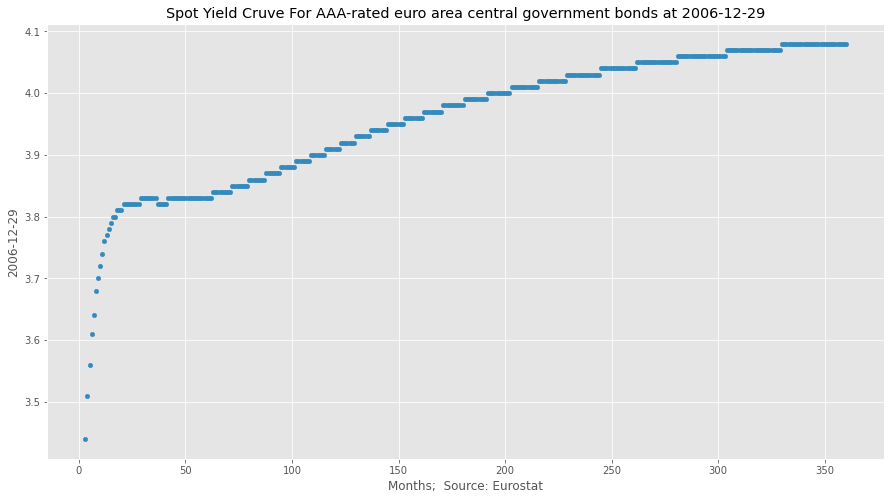

In [74]:
plt.style.use("ggplot")
ax=ts.plot(x='Months',y='2006-12-29',kind='scatter',title="Spot Yield Cruve For AAA-rated euro area central government bonds at 2006-12-29",figsize=(15,8))
#,style="b--"
ax.set_xlabel('Months;  Source: Eurostat')

In [79]:
ts2=ts.iloc[::3,:]
ts2

,2006-12-29,2007-01-02,2007-01-03,2007-01-04,2007-01-05,Months
TIME,,,,,,
3 month,3.44,3.45,3.45,3.45,3.46,3
6 month,3.61,3.61,3.61,3.62,3.63,6
9 month,3.7,3.70,3.70,3.71,3.72,9
1 yea,3.76,3.75,3.75,3.75,3.78,12
1 year and 3 month,3.79,3.78,3.77,3.78,3.81,15
...,...,...,...,...,...,...
29 year,4.08,4.06,4.05,4.06,4.11,348
29 years and 3 month,4.08,4.06,4.05,4.07,4.11,351
29 years and 6 month,4.08,4.07,4.05,4.07,4.11,354


In [85]:
df.loc['2006-12-29']

1M    3.63350
1W    3.62738
2M    3.66163
3M    3.72313
6M    3.85350
ON    3.68213
Name: 2006-12-29 00:00:00, dtype: float64

,2006-12-29,2007-01-02,2007-01-03,2007-01-04,2007-01-05,Months
TIME,,,,,,
3 month,3.44,3.45,3.45,3.45,3.46,3
4 month,3.51,3.52,3.51,3.52,3.53,4
5 month,3.56,3.57,3.57,3.57,3.58,5
6 month,3.61,3.61,3.61,3.62,3.63,6
7 month,3.64,3.65,3.65,3.65,3.66,7
...,...,...,...,...,...,...
29 years and 8 month,4.08,4.07,4.05,4.07,4.11,356
29 years and 9 month,4.08,4.07,4.05,4.07,4.11,357
29 years and 10 month,4.08,4.07,4.05,4.07,4.11,358


In [212]:
rfs=pd.read_excel("IRT_EURYLD_D__custom_6182091614413415331.xlsx",sheet_name="Sheet 1",skiprows=9)
rfs=rfs.iloc[1:2,1::2]
rfs.index=pd.to_datetime(rfs.index)
rfs=rfs.T
rfs.columns=['Risk Free Rate']
rfs.index.name='DATE'

def myconvert(sstr):
    try:
        return float(sstr)
    except:
        return np.nan

rfs=rfs.apply(myconvert,axis=1)

rfs=pd.DataFrame(rfs)
rfs.columns=["EuroTreasury_3M"]
rfs.index=pd.to_datetime(rfs.index)

In [213]:
rfs

,EuroTreasury_3M
DATE,
2004-09-06,2.03
2004-09-07,2.04
2004-09-08,2.04
2004-09-09,2.04
2004-09-10,2.03
...,...
2021-02-18,-0.61
2021-02-19,-0.62
2021-02-22,-0.61


In [214]:
df.index=pd.to_datetime(df.index)
finaldf=pd.concat([df,rfs],1)

<AxesSubplot:xlabel='DATE'>

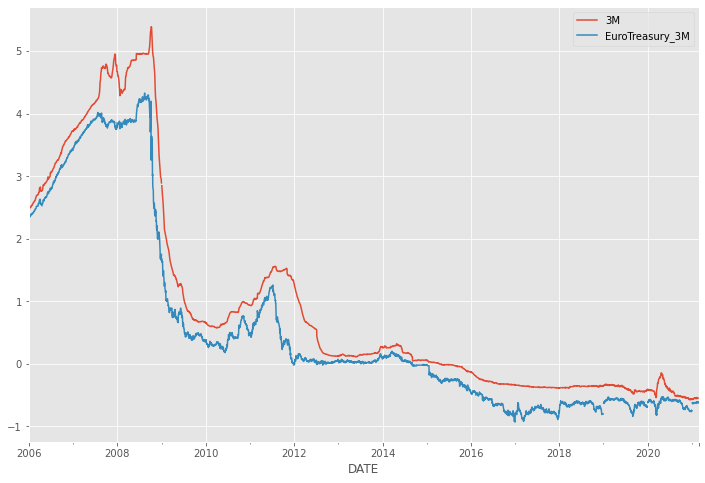

In [215]:
finaldf[finaldf.index.year>2005].plot(y=['3M','EuroTreasury_3M'],figsize=(12,8))

In [216]:
finaldf['Inter-Bank Spread']=finaldf['3M']-finaldf['EuroTreasury_3M']

In [217]:
finaldf['Inter-Bank Spread'].describe()

count    4179.000000
mean        0.349469
std         0.307497
min         0.023250
25%         0.152930
50%         0.261880
75%         0.401000
max         2.337500
Name: Inter-Bank Spread, dtype: float64

In [218]:
finaldf.iloc[finaldf['Inter-Bank Spread'].argmax(),:]

1M                   4.47500
1W                   3.88250
2M                   4.64125
3M                   4.82750
6M                   4.90063
ON                   3.54000
EuroTreasury_3M      2.49000
Inter-Bank Spread    2.33750
Name: 2008-10-29 00:00:00, dtype: float64

In [219]:
finaldf.to_pickle('Euribor3M_VS_EuroTreasury3M.pickle')
finaldf=pd.read_pickle('Euribor3M_VS_EuroTreasury3M.pickle')
finaldf

,1M,1W,2M,3M,6M,ON,EuroTreasury_3M,Inter-Bank Spread
DATE,,,,,,,,
1999-01-04,3.23875,3.25000,3.22875,3.22125,3.20859,NaN,NaN,NaN
1999-01-05,3.23000,3.24500,3.22125,3.21234,3.19750,NaN,NaN,NaN
1999-01-06,3.22500,3.23625,3.21484,3.20734,3.18594,NaN,NaN,NaN
1999-01-07,3.22375,3.23625,3.21500,3.20250,3.17938,NaN,NaN,NaN
1999-01-08,3.22000,3.23500,3.20625,3.19750,3.16375,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-02-18,-0.57857,-0.57629,-0.55757,-0.55129,-0.53514,-0.58600,-0.61,0.05871
2021-02-19,-0.57771,-0.57471,-0.55757,-0.54971,-0.52943,-0.58729,-0.62,0.07029
2021-02-22,NaN,NaN,NaN,NaN,NaN,NaN,-0.61,NaN


In [220]:
# Use Treasury term structure to fit the Ho-Lee tree model for Euribor 3M



In [224]:
ts2

,2006-12-29,2007-01-02,2007-01-03,2007-01-04,2007-01-05,Months
TIME,,,,,,
3 month,3.44,3.45,3.45,3.45,3.46,3
6 month,3.61,3.61,3.61,3.62,3.63,6
9 month,3.7,3.70,3.70,3.71,3.72,9
1 yea,3.76,3.75,3.75,3.75,3.78,12
1 year and 3 month,3.79,3.78,3.77,3.78,3.81,15
...,...,...,...,...,...,...
29 year,4.08,4.06,4.05,4.06,4.11,348
29 years and 3 month,4.08,4.06,4.05,4.07,4.11,351
29 years and 6 month,4.08,4.07,4.05,4.07,4.11,354


In [260]:
# std
# 1991-01 to 2006-12
# Euro Treasury-3M for first day of each 3 Months during this period
std=finaldf['3M'][finaldf.index.year<2007].resample('3M').first().std()*2
std


1.8127053042767403

In [623]:
finaldf['3M'][finaldf.index.year<2007].resample('3M').mean().std()*np.sqrt(4)

1.784924700090515

In [611]:
finaldf

,1M,1W,2M,3M,6M,ON,EuroTreasury_3M,Inter-Bank Spread
DATE,,,,,,,,
1999-01-04,3.23875,3.25000,3.22875,3.22125,3.20859,NaN,NaN,NaN
1999-01-05,3.23000,3.24500,3.22125,3.21234,3.19750,NaN,NaN,NaN
1999-01-06,3.22500,3.23625,3.21484,3.20734,3.18594,NaN,NaN,NaN
1999-01-07,3.22375,3.23625,3.21500,3.20250,3.17938,NaN,NaN,NaN
1999-01-08,3.22000,3.23500,3.20625,3.19750,3.16375,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-02-18,-0.57857,-0.57629,-0.55757,-0.55129,-0.53514,-0.58600,-0.61,0.05871
2021-02-19,-0.57771,-0.57471,-0.55757,-0.54971,-0.52943,-0.58729,-0.62,0.07029
2021-02-22,NaN,NaN,NaN,NaN,NaN,NaN,-0.61,NaN


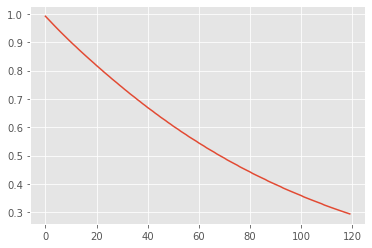

In [633]:
P=np.zeros(120)
for i in np.arange(len(P)):
    # P[i]=1/np.power(ts2.iloc[i,0]/100*0.25+1,i+1)
    P[i]=np.exp(-ts2.iloc[i,0]/100*(i+1)*0.25)

plt.plot(P)


In [635]:
ts2

,2006-12-29,2007-01-02,2007-01-03,2007-01-04,2007-01-05,Months
TIME,,,,,,
3 month,3.44,3.45,3.45,3.45,3.46,3
6 month,3.61,3.61,3.61,3.62,3.63,6
9 month,3.7,3.70,3.70,3.71,3.72,9
1 yea,3.76,3.75,3.75,3.75,3.78,12
1 year and 3 month,3.79,3.78,3.77,3.78,3.81,15
...,...,...,...,...,...,...
29 year,4.08,4.06,4.05,4.06,4.11,348
29 years and 3 month,4.08,4.06,4.05,4.07,4.11,351
29 years and 6 month,4.08,4.07,4.05,4.07,4.11,354


In [677]:
def HoLee(r0,sigma,delta,thetas,compounding=0):
    # r0 is the inital short rate
    # thetas are theta_0 to theta_T
    # delta is the time step
    # m is theta_(T+1)
    # compounding: 0: continuously compounding
    # compounding: 1: 1/delta times a year
    # return P[0,0],Prices, Risk_Neutral_Prices
    """
#########################################################################
#
#Node 0    Node 1      Node 2      Node 3       Node 4       Node 5
#
#                                                            0.066643
#                                               0.0632758
#                                  0.0616506                 0.0616437
#                       0.056084                0.0582758
#            0.05263               0.0566506                 0.0566437
#0.04969                0.051084                0.0532758
#            0.04763               0.0516506                 0.0516437
#                       0.046084                0.0482758
#                                  0.0466506                 0.0466437
#                                               0.0432758
#                                                            0.04164375
#
##########################################################################
    """
    # m=thetas[-1]
    # thetas=thetas[:-1]
    # layers=len(thetas)+2
    layers=len(thetas)+1
    Prices=np.zeros((layers+1,layers+1))
    Prices[:,-1]=np.ones(layers+1)
    InterestRates=np.zeros((layers,layers))

    def discount(rr,TT):
        if compounding==0:
            return np.exp(-rr*TT)
        else:
            return 1/(1+rr*delta)**(TT/delta)
    
    # thetas=thetas+[m]
    for j in np.arange(layers-1,-1,-1):
        for i in np.arange(j+1):
            kk=(j-2*i)*sigma*np.sqrt(delta)
            r=r0+np.sum([theta*delta for theta in thetas[:j]])+kk
            InterestRates[i,j]=r
            # print("At {},{}\n r={}".format(i,j,r))
            # print("r0={},kk={},thedalt={} \n ".format(r0,kk,np.sum([theta*delta for theta in thetas[:j]])))
            Prices[i,j]=0.5*(discount(r,delta)*Prices[i,j+1]+discount(r,delta)*Prices[i+1,j+1])
            # print("discount={} \n ".format(discount(r,delta)))
    import pandas as pd
    return Prices[0,0],pd.DataFrame(Prices),pd.DataFrame(InterestRates)
    
    
       
    # return Prices







In [678]:
HoLee(r0=ts2.iloc[0,0]/100,sigma=std/100,delta=0.25,thetas=[0.2],compounding=1)[2]

,0,1
0,0.0344,0.093464
1,0.0000,0.075336


In [679]:
HoLee(r0=ts2.iloc[0,0]/100,sigma=std/100,delta=0.25,thetas=[0.2],compounding=1)[1]

,0,1,2
0,0.97099,0.977168,1.0
1,0.00000,0.981514,1.0
2,0.00000,0.000000,1.0


In [680]:
from scipy.optimize import fsolve
# root = fsolve(func, 0.2)

In [ ]:
thetas=[]
r0=ts2.iloc[0,0]/100
sigma=std/100
delta=0.25
for i,price in enumerate(P[:]):
    # def HoLee(m,r0,p0,sigma,delta,thetas,compounding=0):
    p0=price

    func=(lambda t: HoLee(r0,sigma,delta,thetas+[t],compounding=0)[0]-p0)
    new_theta=fsolve(func,0.02)
    thetas.append(new_theta[0])
    # print("this is iter {}".format(i))


    

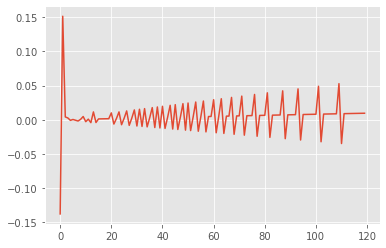

In [647]:
plt.plot(thetas)

In [648]:
pd.DataFrame(HoLee(r0,sigma,delta,thetas,compounding=0)[2])

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,0.0344,0.009074,0.055968,0.066083,0.075818,0.084674,0.093851,0.102748,0.111365,0.120603,...,1.172057,1.183363,1.194688,1.206032,1.217396,1.228779,1.240181,1.251602,1.263042,1.274502
1,0.0000,-0.009053,0.037841,0.047956,0.057691,0.066547,0.075724,0.084621,0.093238,0.102476,...,1.153930,1.165236,1.176561,1.187905,1.199269,1.210652,1.222054,1.233475,1.244915,1.256375
2,0.0000,0.000000,0.019714,0.029829,0.039564,0.048420,0.057597,0.066494,0.075111,0.084349,...,1.135803,1.147109,1.158434,1.169778,1.181142,1.192525,1.203927,1.215348,1.226788,1.238248
3,0.0000,0.000000,0.000000,0.011702,0.021437,0.030293,0.039470,0.048367,0.056984,0.066222,...,1.117676,1.128982,1.140307,1.151651,1.163015,1.174398,1.185800,1.197221,1.208661,1.220121
4,0.0000,0.000000,0.000000,0.000000,0.003310,0.012166,0.021343,0.030240,0.038857,0.048095,...,1.099549,1.110855,1.122180,1.133524,1.144888,1.156271,1.167673,1.179094,1.190534,1.201994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.873959,-0.862557,-0.851136,-0.839696,-0.828236
117,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.880684,-0.869263,-0.857823,-0.846363
118,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.887390,-0.875950,-0.864490
119,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.894077,-0.882617


In [665]:
HoleeTree=pd.DataFrame(HoLee(r0,sigma,delta,thetas,compounding=0)[2])
HoleeTree.index.name="Nodes"
HoleeTree.to_excel("Holeetree_Euro3M_2006_12_29.xlsx")
HoleeTree.to_pickle("Holeetree_Euro3M_2006_12_29.pkl")

HoleeTree=pd.read_pickle("Holeetree_Euro3M_2006_12_29.pkl")
HoleeTree

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
Nodes,,,,,,,,,,,,,,,,,,,,,
0,0.0344,0.009074,0.055968,0.066083,0.075818,0.084674,0.093851,0.102748,0.111365,0.120603,...,1.172057,1.183363,1.194688,1.206032,1.217396,1.228779,1.240181,1.251602,1.263042,1.274502
1,0.0000,-0.009053,0.037841,0.047956,0.057691,0.066547,0.075724,0.084621,0.093238,0.102476,...,1.153930,1.165236,1.176561,1.187905,1.199269,1.210652,1.222054,1.233475,1.244915,1.256375
2,0.0000,0.000000,0.019714,0.029829,0.039564,0.048420,0.057597,0.066494,0.075111,0.084349,...,1.135803,1.147109,1.158434,1.169778,1.181142,1.192525,1.203927,1.215348,1.226788,1.238248
3,0.0000,0.000000,0.000000,0.011702,0.021437,0.030293,0.039470,0.048367,0.056984,0.066222,...,1.117676,1.128982,1.140307,1.151651,1.163015,1.174398,1.185800,1.197221,1.208661,1.220121
4,0.0000,0.000000,0.000000,0.000000,0.003310,0.012166,0.021343,0.030240,0.038857,0.048095,...,1.099549,1.110855,1.122180,1.133524,1.144888,1.156271,1.167673,1.179094,1.190534,1.201994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.873959,-0.862557,-0.851136,-0.839696,-0.828236
117,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.880684,-0.869263,-0.857823,-0.846363
118,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.887390,-0.875950,-0.864490


In [666]:
HoleeTree.iloc[:64,:64]

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
Nodes,,,,,,,,,,,,,,,,,,,,,
0,0.0344,0.009074,0.055968,0.066083,0.075818,0.084674,0.093851,0.102748,0.111365,0.120603,...,0.564299,0.569176,0.579373,0.595291,0.599929,0.610187,0.620465,0.636863,0.641181,0.651520
1,0.0000,-0.009053,0.037841,0.047956,0.057691,0.066547,0.075724,0.084621,0.093238,0.102476,...,0.546172,0.551049,0.561246,0.577164,0.581802,0.592059,0.602338,0.618736,0.623054,0.633393
2,0.0000,0.000000,0.019714,0.029829,0.039564,0.048420,0.057597,0.066494,0.075111,0.084349,...,0.528045,0.532922,0.543119,0.559037,0.563674,0.573932,0.584211,0.600609,0.604927,0.615266
3,0.0000,0.000000,0.000000,0.011702,0.021437,0.030293,0.039470,0.048367,0.056984,0.066222,...,0.509918,0.514795,0.524992,0.540910,0.545547,0.555805,0.566083,0.582482,0.586800,0.597139
4,0.0000,0.000000,0.000000,0.000000,0.003310,0.012166,0.021343,0.030240,0.038857,0.048095,...,0.491791,0.496668,0.506865,0.522783,0.527420,0.537678,0.547956,0.564355,0.568673,0.579012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.459310,-0.449031,-0.432633,-0.428315,-0.417976
60,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.467159,-0.450760,-0.446442,-0.436103
61,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.468887,-0.464569,-0.454230


In [575]:
a2 = 1/(1+0.04991*0.25)**2
a3 = 1/(1+0.05030*0.25)**3
a4 = 1/(1+0.05126*0.25)**4
a5 = 1/(1+0.05166*0.25)**5
a6 = 1/(1+0.05207*0.25)**6

PP=[a2,a3,a4,a5,a6]

thetas2=[]
r0=0.04969
sigma=0.005
delta=0.25
for i,price in enumerate(PP):
    # def HoLee(m,r0,p0,sigma,delta,thetas,compounding=0):
    p0=price
    func=(lambda t: HoLee(r0,sigma,delta,thetas2+[t],compounding=1)[0]-p0)
    new_theta=fsolve(func,0.2)
    thetas2.append(new_theta[0])
    print("this is iter {}".format(i))

print("Prices:")
# print(HoLee(r0,sigma,delta,thetas2,compounding=1)[1])

print("Risk-neutral Interesrates:")
# print(HoLee(r0,sigma,delta,thetas2,compounding=1)[2])

this is iter 0
this is iter 1
this is iter 2
this is iter 3
this is iter 4
Prices:
Risk-neutral Interesrates:


In [576]:
thetas2

[0.001766220445127823,
 0.0038127452653378565,
 0.012263510688098037,
 -0.0034992104072473548,
 0.003471742566344134]

In [581]:
pd.DataFrame(HoLee(r0,sigma,delta,thetas2,compounding=1)[1])

,0,1,2,3,4,5,6
0,0.925334,0.933939,0.943894,0.955360,0.968891,0.983612,1.0
1,0.000000,0.939718,0.948561,0.958898,0.971279,0.984823,1.0
2,0.000000,0.000000,0.953256,0.962452,0.973677,0.986037,1.0
3,0.000000,0.000000,0.000000,0.966024,0.976083,0.987254,1.0
4,0.000000,0.000000,0.000000,0.000000,0.978499,0.988473,1.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.989696,1.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


In [582]:
pd.DataFrame(HoLee(r0,sigma,delta,thetas2,compounding=1)[2])

,0,1,2,3,4,5
0,0.04969,0.052632,0.056085,0.061651,0.063276,0.066644
1,0.00000,0.047632,0.051085,0.056651,0.058276,0.061644
2,0.00000,0.000000,0.046085,0.051651,0.053276,0.056644
3,0.00000,0.000000,0.000000,0.046651,0.048276,0.051644
4,0.00000,0.000000,0.000000,0.000000,0.043276,0.046644
5,0.00000,0.000000,0.000000,0.000000,0.000000,0.041644


In [671]:
HoleeTree.iloc[:65,:65]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Nodes,,,,,,,,,,,,,,,,,,,,,
0,0.0344,0.009074,0.055968,0.066083,0.075818,0.084674,0.093851,0.102748,0.111365,0.120603,...,0.569176,0.579373,0.595291,0.599929,0.610187,0.620465,0.636863,0.641181,0.651520,0.668279
1,0.0000,-0.009053,0.037841,0.047956,0.057691,0.066547,0.075724,0.084621,0.093238,0.102476,...,0.551049,0.561246,0.577164,0.581802,0.592059,0.602338,0.618736,0.623054,0.633393,0.650152
2,0.0000,0.000000,0.019714,0.029829,0.039564,0.048420,0.057597,0.066494,0.075111,0.084349,...,0.532922,0.543119,0.559037,0.563674,0.573932,0.584211,0.600609,0.604927,0.615266,0.632025
3,0.0000,0.000000,0.000000,0.011702,0.021437,0.030293,0.039470,0.048367,0.056984,0.066222,...,0.514795,0.524992,0.540910,0.545547,0.555805,0.566083,0.582482,0.586800,0.597139,0.613897
4,0.0000,0.000000,0.000000,0.000000,0.003310,0.012166,0.021343,0.030240,0.038857,0.048095,...,0.496668,0.506865,0.522783,0.527420,0.537678,0.547956,0.564355,0.568673,0.579012,0.595770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.467159,-0.450760,-0.446442,-0.436103,-0.419345
61,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.468887,-0.464569,-0.454230,-0.437472
62,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.482696,-0.472357,-0.455599


In [674]:
pbonds=0
for i in range(32):
    pvc=np.exp(-ts2.iloc[(i+1)*2,0]/100*0.5*(i+1))*1.5
    pbonds=pbonds+pvc

print(pbonds)


35.311565815003156
